## **Importing required Modules**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor,VotingRegressor,StackingRegressor
from xgboost import XGBRegressor
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"E:\Internship Projects\Medical Cost Personal Predictor\insurance.csv")

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **Data Preprocessing and EDA Exploratory Data Analaysis**

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.describe(include = "O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


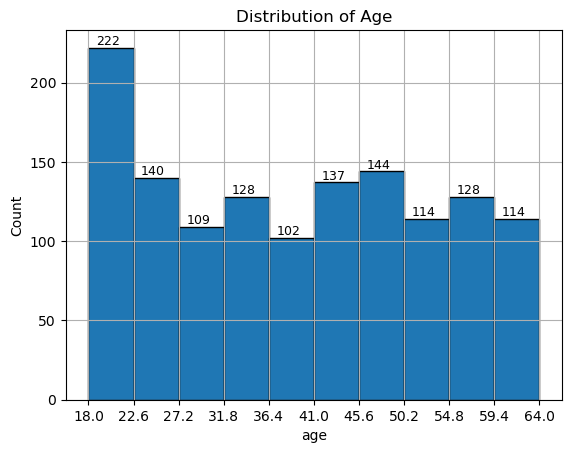

In [8]:
counts, bin_edges, _ = plt.hist(df["age"], bins=10, edgecolor='black')
plt.xticks(bin_edges)
for count, x in zip(counts, bin_edges):
    plt.text(x+2, count, str(int(count)), ha='center', va='bottom', fontsize=9)
plt.xlabel("age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Distribution of Age')

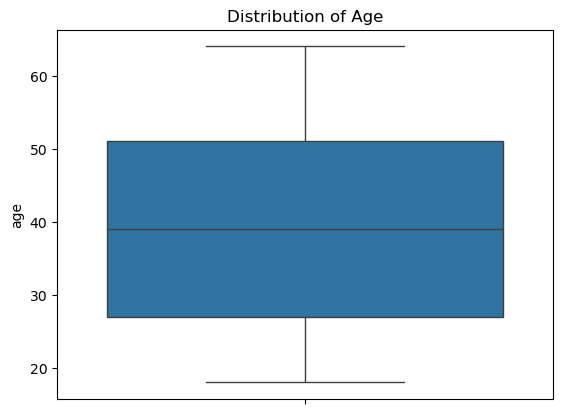

In [9]:
sns.boxplot(y = df["age"])
plt.ylabel("age")
plt.title("Distribution of Age")

## **BMI has Outliers that should not be there**

Text(0.5, 1.0, 'Distribution of BMI')

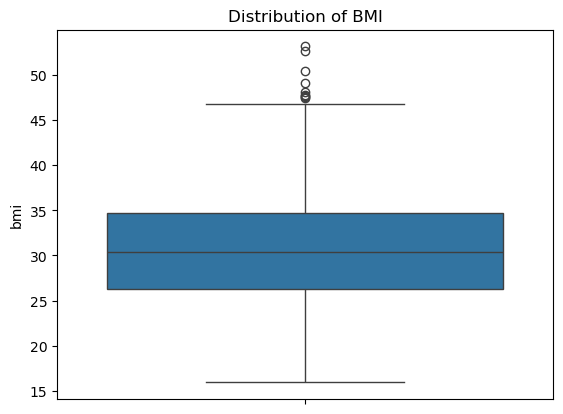

In [10]:
sns.boxplot(y = df["bmi"])
plt.ylabel("bmi")
plt.title("Distribution of BMI")

## **Removing Outliers**

In [11]:
quantile = df["bmi"].quantile(0.992)
df = df[df["bmi"] < quantile]

In [12]:
df.shape

(1327, 7)

Text(0.5, 1.0, 'Distribution of BMI')

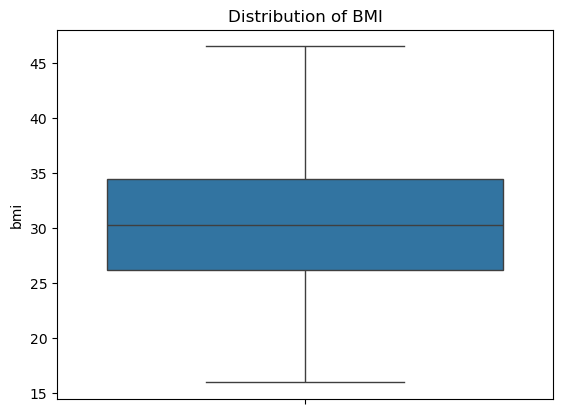

In [13]:
sns.boxplot(y = df["bmi"])
plt.ylabel("bmi")
plt.title("Distribution of BMI")

## **Normal Distribution is GOOD for the Linear Models**

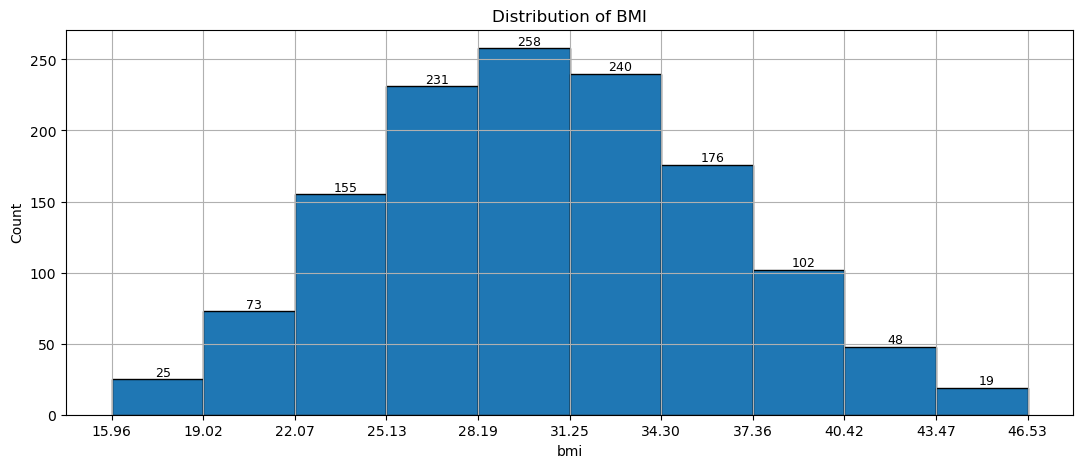

In [14]:
plt.figure(figsize = (13,5))
counts, bin_edges, _ = plt.hist(df["bmi"], bins=10, edgecolor='black')
plt.xticks(bin_edges)
for count, x in zip(counts, bin_edges):
    plt.text(x+1.7, count, str(int(count)), ha='center', va='bottom', fontsize=9)
plt.xlabel("bmi")
plt.ylabel("Count")
plt.title("Distribution of BMI")
plt.grid(True)
plt.show()

## **Data has equal number of Male and Female Records**

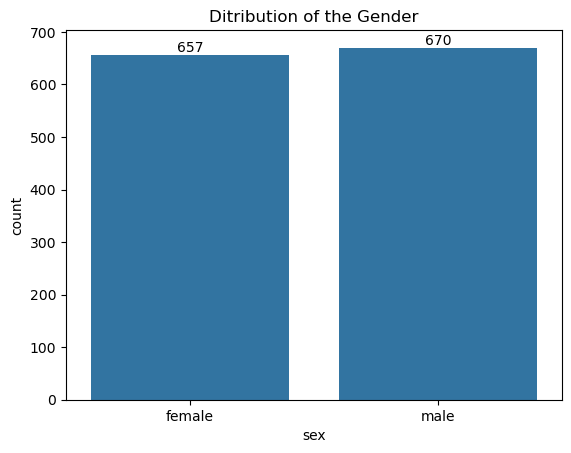

In [15]:
ax = sns.countplot(x = df["sex"])
for i in ax.containers:
    ax.bar_label(i)
plt.title("Ditribution of the Gender")
plt.show()

## **Males Smoke more as Compare to the Female Check Percentage**

In [16]:
(df.groupby("sex")["smoker"].value_counts(normalize = True) * 100).reset_index()

,sex,smoker,proportion
0,female,no,82.800609
1,female,yes,17.199391
2,male,no,76.417910
3,male,yes,23.582090


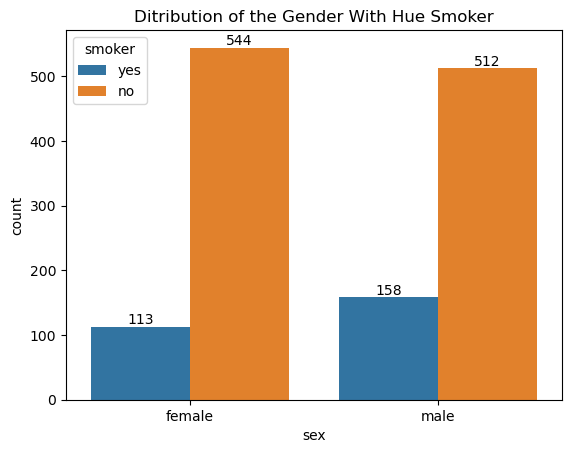

In [17]:
ax = sns.countplot(x = df["sex"],hue = df["smoker"])
for i in ax.containers:
    ax.bar_label(i)
plt.title("Ditribution of the Gender With Hue Smoker")
plt.show()

In [259]:
df["children"].value_counts()

children
0    571
1    320
2    237
3    157
4     25
5     17
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of record With Children')

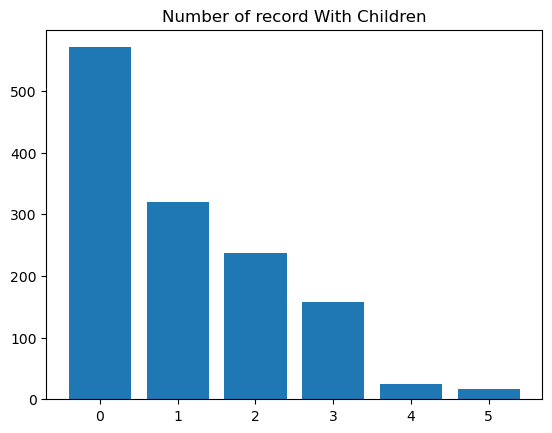

In [260]:
plt.bar(df["children"].value_counts().index,height = df["children"].value_counts().values)
plt.title("Number of record With Children")

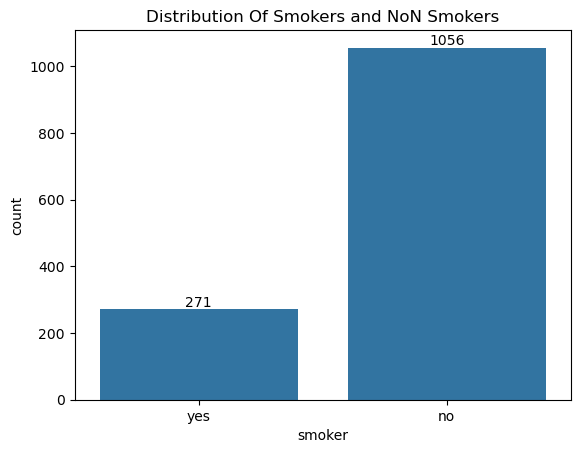

In [261]:
ax = sns.countplot(x = df["smoker"])
for i in ax.containers:
    ax.bar_label(i)
plt.title("Distribution Of Smokers and NoN Smokers")
plt.show()

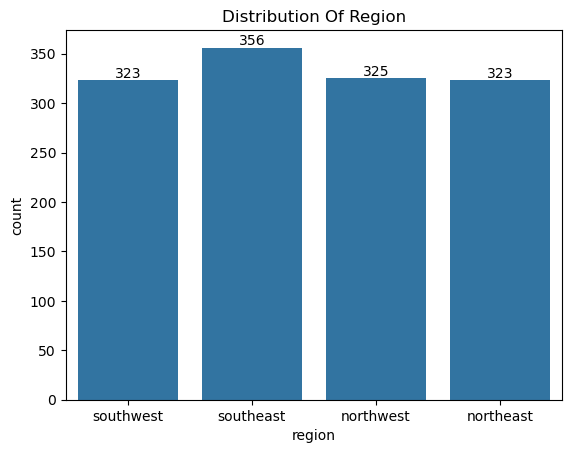

In [262]:
ax = sns.countplot(x = df["region"])
for i in ax.containers:
    ax.bar_label(i)
plt.title("Distribution Of Region")
plt.show()

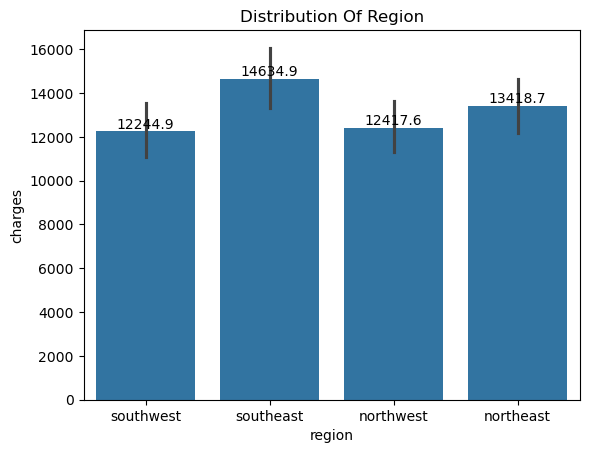

In [263]:
ax = sns.barplot(x = df["region"],y = df["charges"],estimator = "mean")
for i in ax.containers:
    ax.bar_label(i)
plt.title("Distribution Of Region With Mean Charges")
plt.show()

## **Checking Distribution of Categorical Columns in Target Feature**
- Region Shows same median and overlap in distribution
- Slight difference in median of Child feature

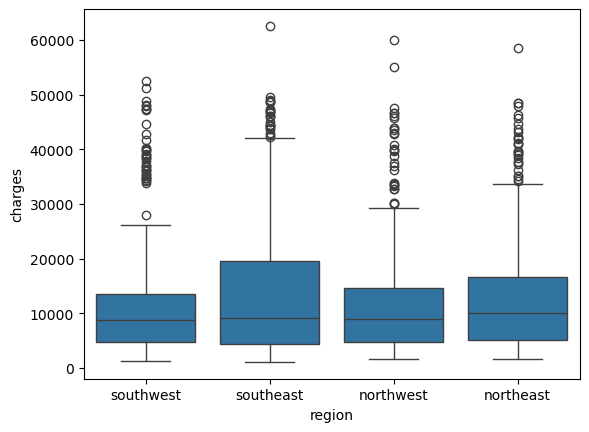

In [264]:
sns.boxplot(x = df["region"],y = df["charges"])
plt.show()

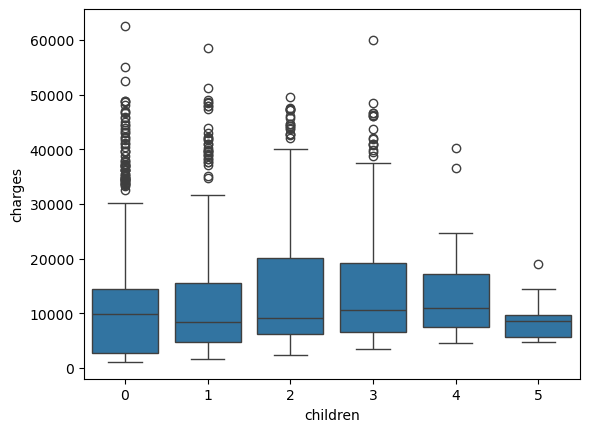

In [265]:
sns.boxplot(x = df["children"],y = df["charges"])
plt.show()

- Gender does not strongly affect the typical (median) charge.
- But males show more variation in charges.
- High-value outliers exist in both groups, but males may have slightly more high-end charges.

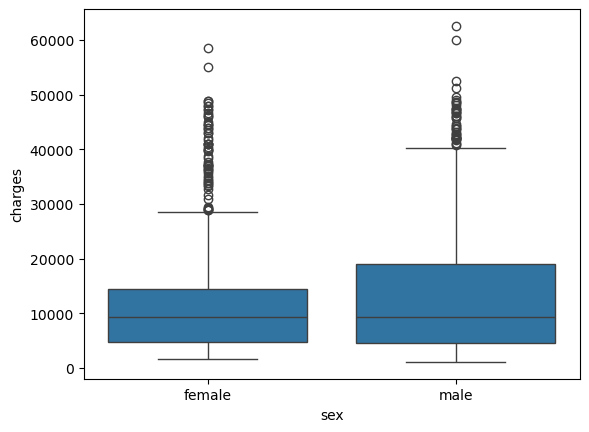

In [266]:
sns.boxplot(x = df["sex"],y = df["charges"])
plt.show()

In [267]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1029,37,female,17.29,2,no,northeast,6877.9801
1158,20,female,30.59,0,no,northeast,2459.7201
4,32,male,28.88,0,no,northwest,3866.8552
1090,47,male,36.19,0,yes,southeast,41676.0811
1316,19,female,20.60,0,no,southwest,1731.6770


In [268]:
df.groupby("children")["charges"].mean().reset_index()

,children,charges
0,0,12297.293834
1,1,12687.898093
2,2,14981.309869
3,3,15355.318367
4,4,13850.656311
5,5,8562.123526


## **People who smokes get higher Charges**

In [269]:
df.groupby("smoker")["charges"].mean().reset_index()

,smoker,charges
0,no,8435.304843
1,yes,31835.343855


In [270]:
df.groupby("sex")["charges"].mean().reset_index()

,sex,charges
0,female,12446.900114
1,male,13966.338394


In [271]:
df["sex_numeric"] = df["sex"].replace({"male":1,"female":0})

In [272]:
df["smoker_numeric"] = df["smoker"].replace({"yes":1,"no":0})

In [273]:
df[["smoker_numeric","sex_numeric","children","age","bmi","charges"]].corr()

,smoker_numeric,sex_numeric,children,age,bmi,charges
smoker_numeric,1.000000,0.079160,0.009136,-0.023778,-0.000789,0.785997
sex_numeric,0.079160,1.000000,0.022417,-0.017676,0.044400,0.063298
children,0.009136,0.022417,1.000000,0.040424,0.009230,0.070236
age,-0.023778,-0.017676,0.040424,1.000000,0.111347,0.302392
bmi,-0.000789,0.044400,0.009230,0.111347,1.000000,0.194693
charges,0.785997,0.063298,0.070236,0.302392,0.194693,1.000000


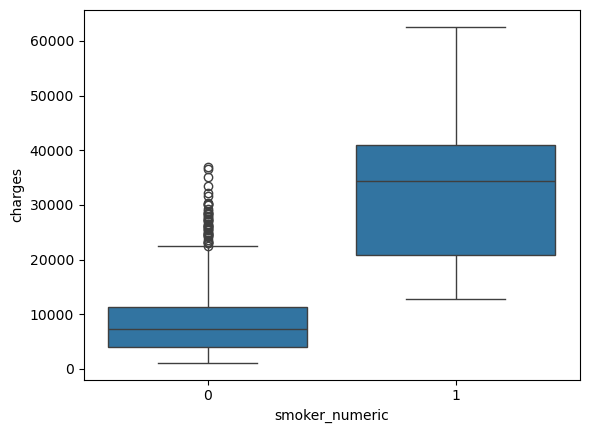

In [274]:
sns.boxplot(x = df["smoker_numeric"],y = df["charges"])
plt.show()

## **Distribution of Target is Right Skewed we have tried log Transformation on it but Results are not good we decided to not do any thing with target column**

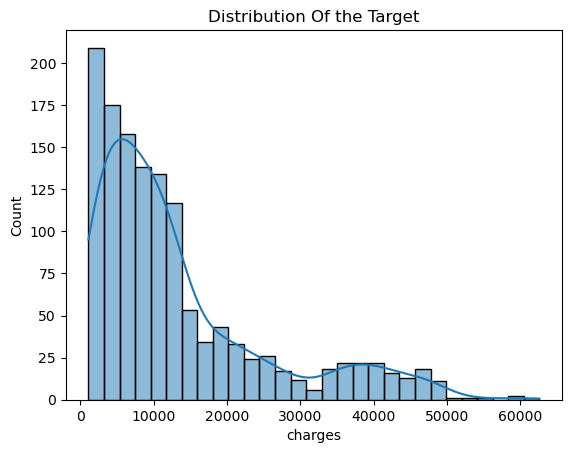

In [275]:
sns.histplot(df["charges"],kde = True)
plt.title("Distribution Of the Target")
plt.show()

In [277]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_numeric,smoker_numeric
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


## **Making Separate Columns for region feature**

In [278]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df.drop(columns = ["sex","smoker"],inplace = True)
df.head()

,age,bmi,children,charges,sex_numeric,smoker_numeric,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,False,False,True
1,18,33.770,1,1725.55230,1,0,False,True,False
2,28,33.000,3,4449.46200,1,0,False,True,False
3,33,22.705,0,21984.47061,1,0,True,False,False
4,32,28.880,0,3866.85520,1,0,True,False,False


In [189]:
df = df.astype(float)
df.head()

,age,bmi,children,charges,sex_numeric,smoker_numeric,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18.0,33.770,1.0,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,3866.85520,1.0,0.0,1.0,0.0,0.0


## **Extracting Important Features**

In [190]:
from sklearn.feature_selection import f_regression

X = df.drop('charges', axis=1)
y = df['charges']               

F, p = f_regression(X, y)

for feature, f_val, p_val in zip(X.columns, F, p):
    print(f"{feature:20s} | F-score: {f_val:.2f} | p-value: {p_val:.5f}")


age                  | F-score: 133.35 | p-value: 0.00000
bmi                  | F-score: 52.20 | p-value: 0.00000
children             | F-score: 6.57 | p-value: 0.01049
sex_numeric          | F-score: 5.33 | p-value: 0.02111
smoker_numeric       | F-score: 2141.70 | p-value: 0.00000
region_northwest     | F-score: 1.90 | p-value: 0.16881
region_southeast     | F-score: 6.84 | p-value: 0.00900
region_southwest     | F-score: 2.79 | p-value: 0.09536


| Feature            | F-score | p-value | Interpretation         |
| ------------------ | ------- | ------- | ---------------------- |
| `age`              | 133.35  | 0.00000 |  Very important       |
| `bmi`              | 52.20   | 0.00000 |  Very important       |
| `children`         | 6.57    | 0.01049 |  Important            |
| `sex_numeric`      | 5.33    | 0.02111 |  Slightly important   |
| `smoker_numeric`   | 2141.70 | 0.00000 |  Extremely important! |
| `region_northwest` | 1.90    | 0.16881 |  Not significant      |
| `region_southeast` | 6.84    | 0.00900 |  Important            |
| `region_southwest` | 2.79    | 0.09536 |  Not significant      |

In [191]:
df.corr()

,age,bmi,children,charges,sex_numeric,smoker_numeric,region_northwest,region_southeast,region_southwest
age,1.000000,0.111347,0.040424,0.302392,-0.017676,-0.023778,0.000560,-0.012256,0.009485
bmi,0.111347,1.000000,0.009230,0.194693,0.044400,-0.000789,-0.127001,0.255444,-0.001814
children,0.040424,0.009230,1.000000,0.070236,0.022417,0.009136,0.026031,-0.022611,0.020519
charges,0.302392,0.194693,0.070236,1.000000,0.063298,0.785997,-0.037796,0.071681,-0.045803
sex_numeric,-0.017676,0.044400,0.022417,0.063298,1.000000,0.079160,-0.010837,0.011077,-0.000288
smoker_numeric,-0.023778,-0.000789,0.009136,0.785997,0.079160,1.000000,-0.036390,0.068761,-0.039043
region_northwest,0.000560,-0.127001,0.026031,-0.037796,-0.010837,-0.036390,1.000000,-0.344844,-0.323030
region_southeast,-0.012256,0.255444,-0.022611,0.071681,0.011077,0.068761,-0.344844,1.000000,-0.343439
region_southwest,0.009485,-0.001814,0.020519,-0.045803,-0.000288,-0.039043,-0.323030,-0.343439,1.000000


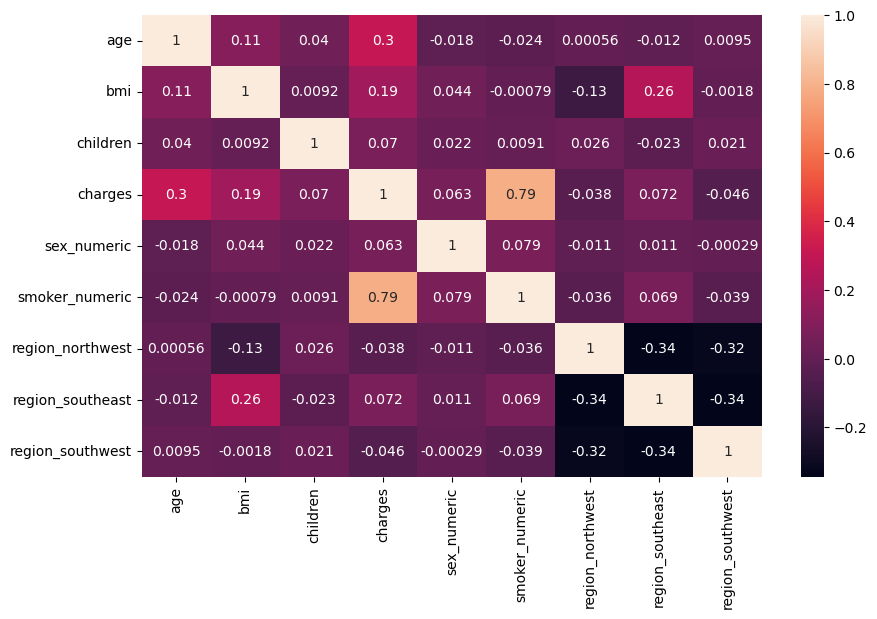

In [192]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [193]:
df.drop(columns = ["region_northwest","region_southwest"],inplace = True)

In [194]:
df.head()

,age,bmi,children,charges,sex_numeric,smoker_numeric,region_southeast
0,19.0,27.900,0.0,16884.92400,0.0,1.0,0.0
1,18.0,33.770,1.0,1725.55230,1.0,0.0,1.0
2,28.0,33.000,3.0,4449.46200,1.0,0.0,1.0
3,33.0,22.705,0.0,21984.47061,1.0,0.0,0.0
4,32.0,28.880,0.0,3866.85520,1.0,0.0,0.0


In [195]:
df.rename(columns = {"smoker_numeric":"smoker","sex_numeric":"sex"},inplace = True)

In [196]:
df.head()

,age,bmi,children,charges,sex,smoker,region_southeast
0,19.0,27.900,0.0,16884.92400,0.0,1.0,0.0
1,18.0,33.770,1.0,1725.55230,1.0,0.0,1.0
2,28.0,33.000,3.0,4449.46200,1.0,0.0,1.0
3,33.0,22.705,0.0,21984.47061,1.0,0.0,0.0
4,32.0,28.880,0.0,3866.85520,1.0,0.0,0.0


## **Model Building**

In [197]:
x = df.drop(["charges"],axis = 1)
y = (df["charges"])

In [198]:
scale = StandardScaler()
x1 = scale.fit_transform(x)

In [199]:
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = 0.2,random_state = 42)

In [200]:
x_train

array([[-1.00998883, -1.12299218,  3.24699714,  0.99025099, -0.50658542,
        -0.60550172],
       [ 0.69906618, -0.0361626 , -0.90803199,  0.99025099, -0.50658542,
        -0.60550172],
       [-0.15546133,  0.62612417, -0.07702616,  0.99025099,  1.97400075,
        -0.60550172],
       ...,
       [ 0.2005918 , -1.00327111,  0.75397966,  0.99025099,  1.97400075,
        -0.60550172],
       [ 1.55359368, -1.16459737, -0.90803199,  0.99025099, -0.50658542,
        -0.60550172],
       [ 0.34301305, -0.93619334, -0.07702616, -1.00984499, -0.50658542,
        -0.60550172]])

In [201]:
x_test

array([[-1.50846321,  1.65521593, -0.90803199, -1.00984499, -0.50658542,
         1.65152296],
       [ 1.48238306, -0.32570079, -0.90803199,  0.99025099, -0.50658542,
        -0.60550172],
       [ 0.27180243,  2.66392963, -0.90803199, -1.00984499,  1.97400075,
         1.65152296],
       ...,
       [ 1.69601494,  0.53442293,  1.58498549,  0.99025099, -0.50658542,
         1.65152296],
       [-1.43725259, -1.66640696, -0.90803199,  0.99025099, -0.50658542,
        -0.60550172],
       [ 1.62480431,  0.06148224,  1.58498549,  0.99025099,  1.97400075,
        -0.60550172]])

In [202]:
lr = LinearRegression()
lr.fit(x_train,y_train)
yhat_lr = lr.predict(x_test)
print("r2 score : ",r2_score(y_test, yhat_lr))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat_lr))

r2 score :  0.7706489236398332
mean_absolue_error :  4078.952347851775


In [203]:
from sklearn.linear_model import RidgeCV

model = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100])
model.fit(x_train, y_train)
print("Best alpha:", model.alpha_)

Best alpha: 1.0


In [204]:
rr = Ridge(alpha = 1)
rr.fit(x_train,y_train)
yhat_rr = rr.predict(x_test)
print("r2 score : ",r2_score(y_test, yhat_rr))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat_rr))

r2 score :  0.7706440396726213
mean_absolue_error :  4080.610653208691


In [205]:
from sklearn.linear_model import LassoCV

model = LassoCV(alphas=[0.01, 0.1, 1, 10, 100])
model.fit(x_train, y_train)
print("Best alpha:", model.alpha_)

Best alpha: 10.0


In [206]:
ll = Lasso(alpha = 10)
ll.fit(x_train,y_train)
yhat_ll = ll.predict(x_test)
print("r2 score : ",r2_score(y_test, yhat_ll))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat_ll))

r2 score :  0.770569648098223
mean_absolue_error :  4080.172615924871


In [207]:
knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(x_train,y_train)
yhat = knn.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat))

r2 score :  0.81828775195546
mean_absolue_error :  3185.73151029377


In [208]:
dt = DecisionTreeRegressor(random_state = 42,max_depth = 3)
dt.fit(x_train,y_train)
yhat_dt = dt.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat_dt))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat_dt))

r2 score :  0.8669986362094612
mean_absolue_error :  2725.9254598715283


In [209]:
rf = RandomForestRegressor(n_estimators=50,random_state = 42,max_depth = 3)
rf.fit(x_train,y_train)
yhat_rf = rf.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat_rf))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat_rf))

r2 score :  0.8768434738247346
mean_absolue_error :  2561.0428658257906


In [210]:
et = ExtraTreesRegressor(n_estimators=50,
                              random_state=3,max_depth = 6)
et.fit(x_train,y_train)
yhat_et = et.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat_et))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat_et))

r2 score :  0.8717743197785541
mean_absolue_error :  2536.5223840345557


In [211]:
ab = AdaBoostRegressor(n_estimators=100,
                              random_state=3,
                              )
ab.fit(x_train,y_train)
yhat = ab.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat))

r2 score :  0.8319341872184117
mean_absolue_error :  3969.7379173757536


In [212]:
ab = GradientBoostingRegressor(n_estimators=100,
                              random_state=3,max_depth = 2
                              )
ab.fit(x_train,y_train)
yhat = ab.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat))

r2 score :  0.8787390750015682
mean_absolue_error :  2412.187049595648


In [213]:
ab = XGBRegressor(n_estimators=100,
                              random_state=3,max_depth = 2
                              )
ab.fit(x_train,y_train)
yhat = ab.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat))

r2 score :  0.8710629929837992
mean_absolue_error :  2427.858898574806


## **Hyper Parameter Tunning of the Models Perfroming well**

In [214]:
models = {
    "DecisionTree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            "max_depth": [2,3,4,5,6,7, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    "RandomForest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [50,100, 200],
            "max_depth": [None, 1,2,3,4,5,6,7,8,9,10,20],
            "min_samples_split": [2, 5],
        }
    },
    "ExtraTrees": {
        "model": ExtraTreesRegressor(random_state=42),
        "params": {
            "n_estimators": [50,100, 200],
            "max_depth": [None, 1,2,3,4,5,6,7,8,9,10,20],
            "min_samples_split": [2, 5],
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1,0.001,0,1],
            "max_depth": [None, 1,2,3,4,5,6,7,8,9,10,20]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(random_state=42, objective='reg:squarederror'),
        "params": {
            "n_estimators": [50,100, 200],
            "learning_rate": [0.01, 0.1,0.001,1,0],
            "max_depth": [None, 1,2,3,4,5,6,7,8,9,10,20]
        }
    }
}


In [215]:
best_models = {}
for name, config in models.items():
    print(f"🔍 Tuning {name}...")
    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
    grid.fit(x_train, y_train)
    
    best_model = grid.best_estimator_
    best_models[name] = best_model
    
    y_pred = best_model.predict(x_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"✅ Best params for {name}: {grid.best_params_}")
    print(f"📊 R² Score: {r2:.4f}")
    print(f"📉 MAE: {mae:.2f}\n")

🔍 Tuning DecisionTree...
✅ Best params for DecisionTree: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
📊 R² Score: 0.8761
📉 MAE: 2505.91

🔍 Tuning RandomForest...
✅ Best params for RandomForest: {'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 200}
📊 R² Score: 0.8760
📉 MAE: 2445.93

🔍 Tuning ExtraTrees...
✅ Best params for ExtraTrees: {'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 50}
📊 R² Score: 0.8580
📉 MAE: 2571.36

🔍 Tuning GradientBoosting...
✅ Best params for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
📊 R² Score: 0.8752
📉 MAE: 2388.42

🔍 Tuning XGBoost...
✅ Best params for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
📊 R² Score: 0.8802
📉 MAE: 2371.52



## **Final Model I choose for Votting and Stacking are Listed Below With Their Parameters**

- ### **DecisionTreeRegressor**
- ### **RandomForestRegressor**
- ### **ExtraTreesRegressor**
- ### **GradientBoostingRegressor**
- ### **XGBRegressor**

In [216]:
dt = DecisionTreeRegressor(random_state = 42, max_depth =  5, min_samples_leaf =  4, min_samples_split= 2)
dt.fit(x_train,y_train)
yhat_dt = dt.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat_dt))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat_dt))

r2 score :  0.8760594081637669
mean_absolue_error :  2505.90782060196


In [217]:
rf = RandomForestRegressor(n_estimators=50,random_state = 42,max_depth = 3)
rf.fit(x_train,y_train)
yhat_rf = rf.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat_rf))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat_rf))

r2 score :  0.8768434738247346
mean_absolue_error :  2561.0428658257906


In [218]:
et = ExtraTreesRegressor(n_estimators=50,
                              random_state=3,max_depth = 6)
et.fit(x_train,y_train)
yhat_et = et.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat_et))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat_et))

r2 score :  0.8717743197785541
mean_absolue_error :  2536.5223840345557


In [219]:
ab = GradientBoostingRegressor(n_estimators=100,
                              random_state=3,max_depth = 2
                              )
ab.fit(x_train,y_train)
yhat = ab.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat))

r2 score :  0.8787390750015682
mean_absolue_error :  2412.187049595648


In [220]:
ab = XGBRegressor(random_state=3,learning_rate = 0.1, max_depth =  3, n_estimators =  50)
ab.fit(x_train,y_train)
yhat = ab.predict(x_test)

print("r2 score : ",r2_score(y_test, yhat))
print("mean_absolue_error : ",mean_absolute_error(y_test, yhat))

r2 score :  0.880235125503266
mean_absolue_error :  2371.5195627525845


## **Votting Regressor**

In [221]:
dt = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_leaf=4, min_samples_split=2)
rf = RandomForestRegressor(n_estimators=50, random_state=42, max_depth=3)
et = ExtraTreesRegressor(n_estimators=50, random_state=3, max_depth=6)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=3, max_depth=2)
xgb = XGBRegressor(random_state=3, learning_rate=0.1, max_depth=3, n_estimators=50)

In [222]:
voting_reg = VotingRegressor([
    ('dt', dt),
    ('rf', rf),
    ('et', et),
    ('gbr', gbr),
    ('xgb', xgb)
])

In [223]:
voting_reg.fit(x_train, y_train)
voting_preds = voting_reg.predict(x_test)
print("🔷 VotingRegressor:")
print("R² Score:", r2_score(y_test, voting_preds))
print("MAE:", mean_absolute_error(y_test, voting_preds))

🔷 VotingRegressor:
R² Score: 0.8815879214466029
MAE: 2363.182696819116


## **Stacking Classifier**

In [226]:
stacking_reg = StackingRegressor(
    estimators=[
        ('dt', dt),
        ('rf', rf),
        ('et', et),
        ('xgb', xgb)
    ],
    final_estimator=gbr
)

In [227]:
stacking_reg.fit(x_train, y_train)
stacking_preds = stacking_reg.predict(x_test)
print("\n🔷 StackingRegressor:")
print("R² Score:", r2_score(y_test, stacking_preds))
print("MAE:", mean_absolute_error(y_test, stacking_preds))


🔷 StackingRegressor:
R² Score: 0.8802153189320387
MAE: 2271.601758364907


## **Trying Stacking Regressor each time with Different meta model Listed Below**
- ### **DecisionTreeRegressor**
- ### **RandomForestRegressor**
- ### **ExtraTreesRegressor**
- ### **GradientBoostingRegressor**
- ### **XGBRegressor**

In [231]:
stacking_gbr = StackingRegressor(
    estimators=[
        ('dt', dt),
        ('rf', rf),
        ('et', et),
        ('xgb', xgb)
    ],
    final_estimator=GradientBoostingRegressor(
        n_estimators=100, random_state=3, max_depth=2)
)

In [232]:
stacking_rfmeta = StackingRegressor(
    estimators=[
        ('dt', dt),
        ('et', et),
        ('xgb', xgb)
    ],
    final_estimator=RandomForestRegressor(
        n_estimators=100, random_state=42, max_depth=4)
)

In [233]:
stacking_xgbmeta = StackingRegressor(
    estimators=[
        ('dt', dt),
        ('rf', rf),
        ('et', et)
    ],
    final_estimator=XGBRegressor(
        random_state=42, learning_rate=0.1, max_depth=3, n_estimators=50)
)

In [235]:
for name, model in {
    "Stacking_GBR": stacking_gbr,
    "Stacking_RF": stacking_rfmeta,
    "Stacking_XGB": stacking_xgbmeta
}.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    
    print(f"\n📌 {name}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")



📌 Stacking_GBR
R² Score: 0.8802
MAE: 2271.60

📌 Stacking_RF
R² Score: 0.8851
MAE: 2273.32

📌 Stacking_XGB
R² Score: 0.8789
MAE: 2396.49


# **The Final model is stacking Model With Meta Model**
- ### **GradientBoostingRegressor**
### **The reason is the it has the Smallest MEAN ABSOLUTE ERROR with acceptable R2 score**

In [236]:
stacking_reg.fit(x_train, y_train)
stacking_preds = stacking_reg.predict(x_test)
print("\n🔷 StackingRegressor:")
print("R² Score:", r2_score(y_test, stacking_preds))
print("MAE:", mean_absolute_error(y_test, stacking_preds))


🔷 StackingRegressor:
R² Score: 0.8802153189320387
MAE: 2271.601758364907


In [237]:
stacking_reg

StackingRegressor(estimators=[('dt',
                               DecisionTreeRegressor(max_depth=5,
                                                     min_samples_leaf=4,
                                                     random_state=42)),
                              ('rf',
                               RandomForestRegressor(max_depth=3,
                                                     n_estimators=50,
                                                     random_state=42)),
                              ('et',
                               ExtraTreesRegressor(max_depth=6, n_estimators=50,
                                                   random_state=3)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_b...
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                  final_estimator=GradientBoostingRegressor(max_depth=2,
                                                            random_state=3))

In [279]:
import pickle

In [280]:
pickle.dump(stacking_reg,open("Insurance_stacking_reg.pkl","wb"))
pickle.dump(scale, open('ScaleInsurance_stacking_reg.pkl','wb'))